In [1]:
# import the necessary packages
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import imutils
import pickle
import cv2
import os
import matplotlib.pyplot as plt
from imutils import list_images

%matplotlib inline

Using TensorFlow backend.


In [2]:
# Constants
TEST_IMAGE_DIRECTORY = "examples"
MODEL = "pokedex.model"
LABELBIN = "lb.pickle"
IMAGE_DIMS = (96, 96, 3)

In [3]:
# Load the trained convolutional neural network and the label binarizer
model = load_model(MODEL)
lb = pickle.loads(open(LABELBIN, "rb").read())

In [4]:
# Paths to testing images
test_images_paths = [os.path.join(TEST_IMAGE_DIRECTORY, f)
                     for f in os.listdir(TEST_IMAGE_DIRECTORY)
                     if os.path.isfile(os.path.join(TEST_IMAGE_DIRECTORY, f))]
test_images_paths.sort()

In [5]:
# Classify images
labels = []
images = []

for image_path in test_images_paths:

    # Load the image and save a copy before resizing
    image = cv2.imread(image_path)
    output = image.copy()
    
    # Pre-process the image for classification
    image = cv2.resize(image, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)    
    
    # Classify the input image
    proba = model.predict(image)[0]
    idx = np.argmax(proba)
    label = lb.classes_[idx]
        
    # Original image
    output = imutils.resize(output, width=400)
    output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
    images.append(output)
    
    # we'll mark our prediction as "correct" of the input image filename
    # contains the predicted label text (obviously this makes the
    # assumption that you have named your testing image files this way)
    filename = image_path[image_path.rfind(os.path.sep) + 1:]
    if filename.rfind(label) != -1:
        correct = "correct"
        label_color = "G"
    else:
        correct = "incorrect"
        label_color = "R"
    label = "{}: {:.2f}% ({})".format(label, proba[idx] * 100, correct)
    labels.append((label, label_color))

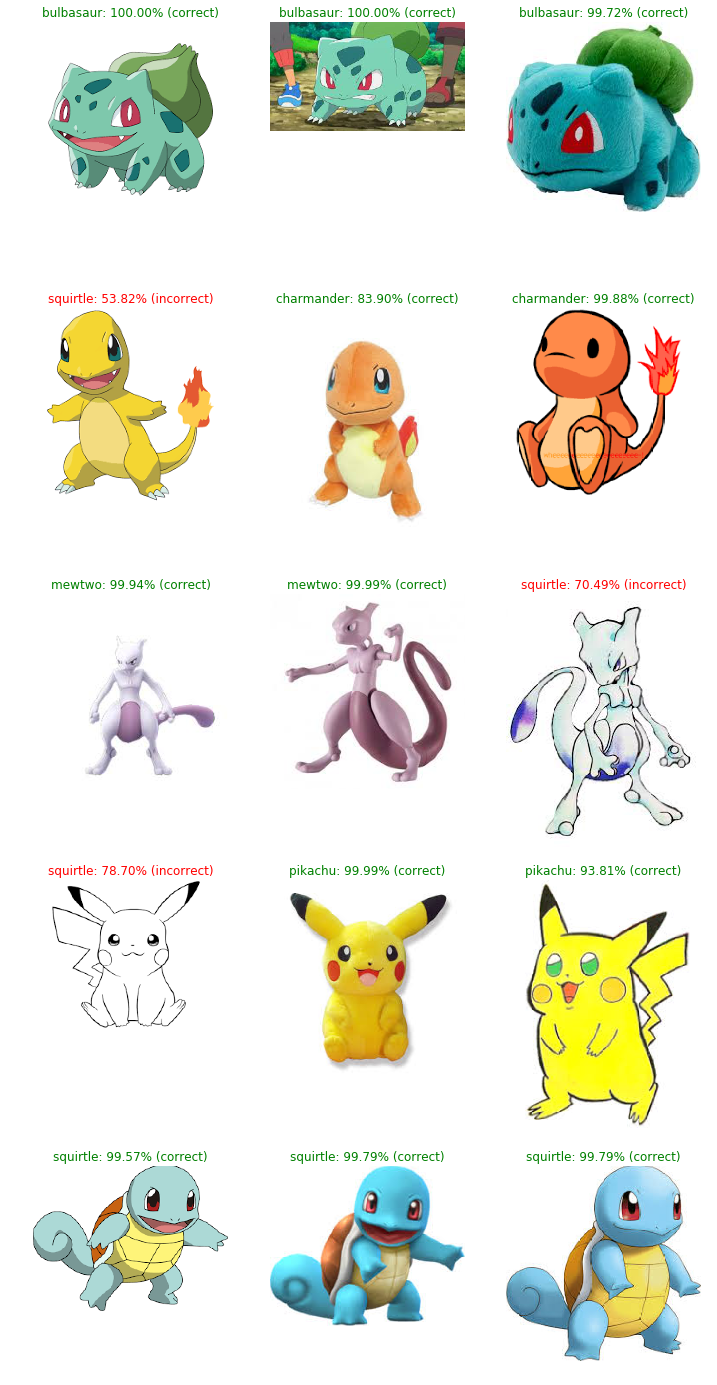

In [6]:
# Show results
num_cols = 3
num_rows = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10,20))
fig.tight_layout()

for idx, (label, label_color) in zip(range(len(images)), labels):
    col = idx%num_cols
    row = int((idx - col)/num_cols)
    ax = axes[row,col]
    ax.axis('off')
    ax.imshow(images[idx])
    ax.set_title(label, color = label_color, fontsize = 12)
    ax.set_anchor('N')
fig.savefig("classifier_results.png")